<a href="https://colab.research.google.com/github/jaewoo-cho/jaewoo/blob/master/32_%ED%9A%8C%EA%B7%80_(Legression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀 (Regression)
KNN regression 사용

In [ ]:
# 지도학습은 target y 의 형태에 따라
# 회귀(regression) 와 분류 (classification) 으로 나뉜다.

# '분류' 는 몇개의 클래스 중 하나로 분류 하는 문제
# '회귀' 는 임의의 어떤 숫자를 예측 하는 문제
#   - 내년 경제 성장률 예측, 주가 예측
#   - 주문후 배달 도착시간 예측
#   - 회귀 문제의 출력은 정해진 클래스가 아니라 '임의의 수치'

# k-최근접 이웃 회귀
k-nearest neighbor (KNN) regression


In [ ]:
# 'k-최근접 이웃 회귀' 도 비슷하다.
# '분류' 와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택합니다.
# 하지만 회귀이기 때문에 이웃한 샘플의 타깃은 어떤 클래스가 아니라 '임의의 수치' 가 된다.
# 이웃 샘플의 수치를 사용해 새로운 샘플 X 의 타킷을 예측하는 방법은 ?
# => 바로 이 수치들의 평균값을 구하면 된다.


데이터 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [ ]:
base_path = r'/content/drive/MyDrive/dataset'

In [ ]:
file_path = os.path.join(base_path, 'fish.csv')
fish_df = pd.read_csv(file_path)
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [ ]:
# 농어의 길이(특징(feature)) 가 주어졌을 때 무게(target)를 예측해보자.

In [ ]:
# 농어의 길이 (feature)
perch_length = fish_df[fish_df.Species == 'Perch']['Length'].values
print(perch_length)

# 농어의 무게 (target)
perch_weight = fish_df[fish_df.Species == 'Perch']['Weight'].values
print(perch_weight)

[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


Text(0, 0.5, 'weight')

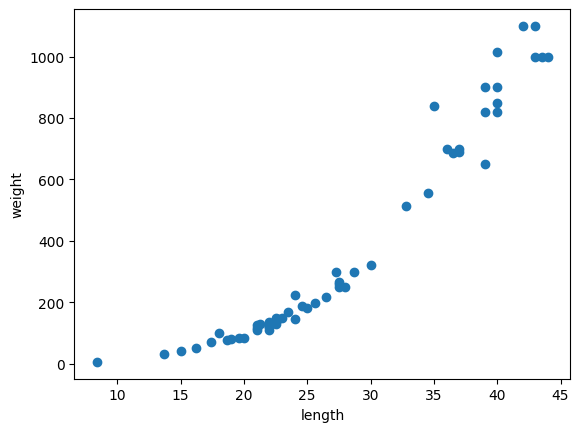

In [ ]:
# 시각화
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = \
train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
train_input.shape, test_input.shape

((42,), (14,))

In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [ ]:
train_input.shape, test_input.shape

((42, 1), (14, 1))

# 결정 계수 ($R^2$)


KNeighborsRegressor 의 score 값


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#kneighborsregressor

```python
class sklearn.neighbors.KNeighborsRegressor(
  n_neighbors=5,
  *,
  weights='uniform',
  algorithm='auto',
  leaf_size=30,
  p=2,
  metric='minkowski',
  metric_params=None,
  n_jobs=None)
```


In [ ]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
knr.score(test_input, test_target)

0.992809406101064

In [ ]:
"""
매우 높은 점수가 나왔다?  이 점수는 무엇일까?
'분류' 문제의 경우 test 세트의 샘플을 정확하게 분류한 개수의 비율이다. (accuracy: 정확도)
'회귀' 문제는 정확한 숫자를 맞힌다는것이 거의 불가능하다.
예측하는 값이나 타킷 모두 임의의 수치이기 때문이다.

'회귀' 의 경우 평가방식이 조금 다르다
이 점수를 '결정계수' (coeffiencit of determination) 이라고 부름.
간단히 R² 라고도 부름

이 값은 다음과 같은 식으로 계산됨

          (target - 예측)² 의 합
 R² = 1 - ──────────────────
          (target - 평균)² 의 합

"""
None


In [ ]:
from sklearn.metrics import mean_absolute_error # target 과 예측의 절대값 오차를 평균하여 리턴

In [ ]:
# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

test_prediction

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [ ]:
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
# 테스트세트에 대한 평균절대값 오차 (mae) 계산
mae = mean_absolute_error(test_target, test_prediction)

mae # <- 예측이 평균적으로 19g 정도 target값과 다르다

19.157142857142862

In [ ]:
# train 데이터를 사용하여 결정계수 확인
knr.score(train_input, train_target)

0.9698823289099254

Overfit(과대적합) vs Underfit(과소적합)

In [ ]:
# test 데이터셋의 점수가 train 데이터셋의 점수보다 높다구?

In [ ]:
# 만약, train 세트에서의 점수가 높았는데, test 세트에서의 점수가 낮다면
# => 모델이 train 세트에 과대적합(overfit) 되었다고 합니다.
#   즉, 모델이 train 세트에만 잘 맞는 모델로 학습된겁니다.
# 나중에 실전에 투입하여 새로운 데이터에 대한 예측을 할때 잘 동작 하지 않을 가능성 큼.

# 반대로, 훈련세트보다 테스트 세트의 점수가 높거나, 두 점수가 모두 너무 낮은 경우는
#  => 모델이 train 세트에 과소적합(underfit) 되었다고 합니다
#     즉, 모델이 너무 '단순' 하여 train 세트에 적절히 훈련되지 않은 경우.


In [ ]:
# 현재 train 세트보다 test 점수가 높으니 과소적합(underfit) 이라 볼수 있습니다.
# 이 문제를 어떻게 해결할수 있는가?
# => 모델을 조금 더 복잡하게 만들어 보자.  모델이 좀더 복잡해질수록 train 세트에 더 잘 맞게 되고
# test 세트의 점수는 조금 낮아질 거다.

In [ ]:
# k-최근접 이웃 알고리즘의 복잡도를 높이는 방법은 '이웃의 개수 k' 를 줄이는 거다.
#    이웃의 개수를 줄이면 훈련 세트에 있는 '국지적인 패턴' 에 민감해지고,
#    이웃의 개수를 늘리면 데이터 전반에 있는 '일반적인 패턴' 을 따르게 될것이다.


In [ ]:
# 이웃의 개수를 낮추어 보자

knr.n_neighbors = 3
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [ ]:
# k값을 줄였더니 train 세트의 결정계수 값이 높아졌다

In [ ]:
knr.score(test_input, test_target)

0.9746459963987609

In [ ]:
# test 세트 점수가 train 세트보다 낮아졌으므로 underfit 문제는 해결한듯 하다
# 또한 두 점수 차이가 크지 않기 때문에 overfit 되지도 않았다.

# 단순한 모델 vs 복잡한 모델 시각화
k 값의 변화에 따른 결과 변화

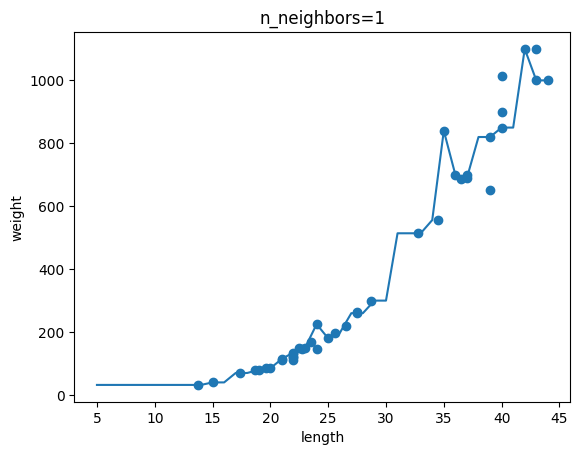

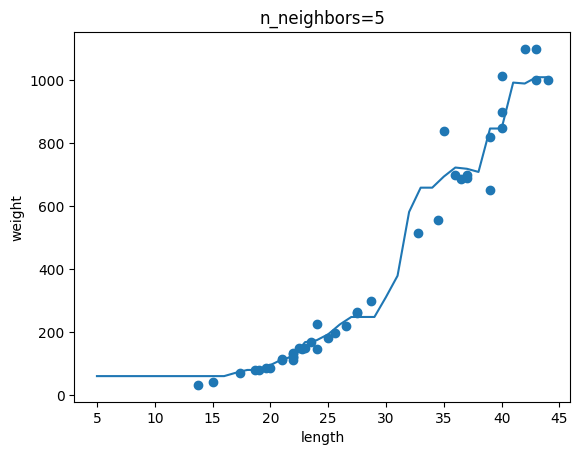

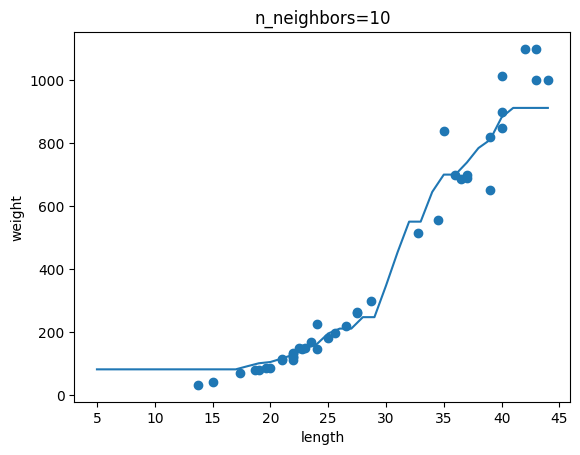

In [ ]:
knr = KNeighborsRegressor()
# 농어의 length 5~45까지 x 좌표
x = np.arange(5, 45).reshape(-1, 1) # predict() 에 전달하기 위해 feature vector 형태로 만듬

# n=1, 5, 10 일 때 예측 결과를 시각화
for n in [1,5,10]:
  # 모델 훈련
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  # 지정한 범위 x에 대한 예측
  prediction = knr.predict(x)

  # 그래프 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title(f'n_neighbors={n}')
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()


# KNN Regressor의 문제점

In [ ]:
# length 50cm 농어의 무게를 예측해보자

In [ ]:
train_input.shape, test_input.shape

((42, 1), (14, 1))

In [ ]:
# k-최근접 이웃 개수를 3으로 하는 회귀 모델을 훈련합니다
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# 50cm 길이 농어의 무게 예측
knr.predict([[50]])

array([1033.33333333])

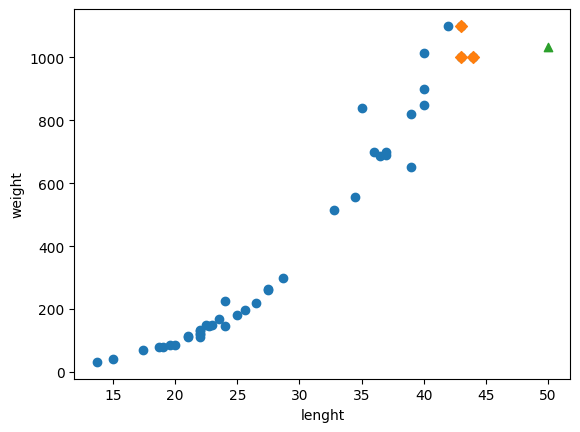

In [ ]:
# 50cm 길이 농어의 무게 예측을 위해 참조함 이웃(들)
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어
plt.scatter(50, 1033, marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [ ]:
# 이웃 샘플의 타겟 평균 구하기
np.mean(train_target[indexes])

1033.3333333333333

In [ ]:
"""
↑ 모델이 예측했던 값과 정확히 일치합니다. KNN 은 가장 가까운 샘플을 찾아 target 을 평균합니다.
따라서 새로운 샘플이 train 세트를 벗어나면 엉뚱한 값을 예측할수 있습니다.
"""
None

In [ ]:
# 50cm 뿐 아니라 100cm 농어 무게도 1033이라 예측
knr.predict([[100]])

array([1033.33333333])

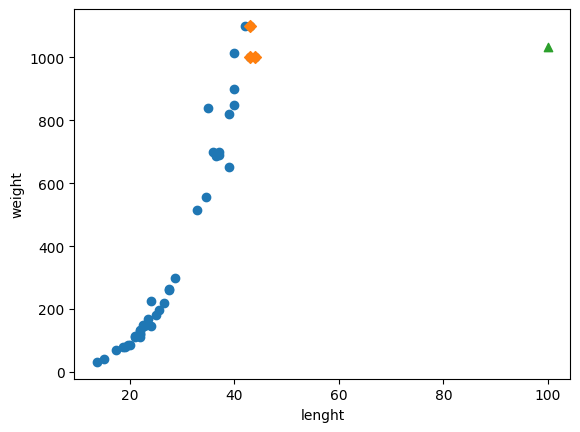

In [ ]:
# 100cm 길이 농어의 무게 예측을 위해 참조함 이웃(들)
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어
plt.scatter(100, 1033, marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

# 선형 회귀 (Linear Regression)

In [ ]:
"""
선형회귀는
특성(feature) 가 한개인경우 어떤 '직선' 을 학습하는 알고리즘.
즉 특성을 가장 잘 나타낼수 있는 직선을 찾아야 함.
"""
None

In [ ]:
from sklearn.linear_model import LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
```python
class sklearn.linear_model.LinearRegression(
  *,
  fit_intercept=True,
  copy_X=True,
  n_jobs=None,
  positive=False)
```


In [ ]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [ ]:
# 50cm 농어의 무게는?
lr.predict([[50]])

array([1241.83860323])

In [ ]:
"""
↑ KNN 을 사용했을때보다 농어의 무게를 아주 높게 예측함.


선형회귀는 농어의 무게를 예측하는 '직선' 을 학습하였을테고
이는 아래와 같다.

농어의 무게 = a x length + b
"""
None

In [ ]:
# LinearRegression 이 찾은
#  기울기 : coef_    <- 머신러닝에서는 이를 '기울기', '계수' 혹은 '가중치(weight)' 라고도 부름.
#  절편 : intercept_


In [ ]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


- 모델 파라미터 (Model parameter)
  - 머신러닝 알고리즘이 찾아낸 값

- 모델 기반 학습 (Model based learning)
  - 최적의 모델 파라미터를 찾는 학습
  - LinearRegression 은 모델 기반 학습

- 사례 기반 학습 (Instance based learning)
  - 훈련 데이터를 저장한것만으로도 훈련하여 학습
  - KNN 알고리즘은 사례 기반 학습



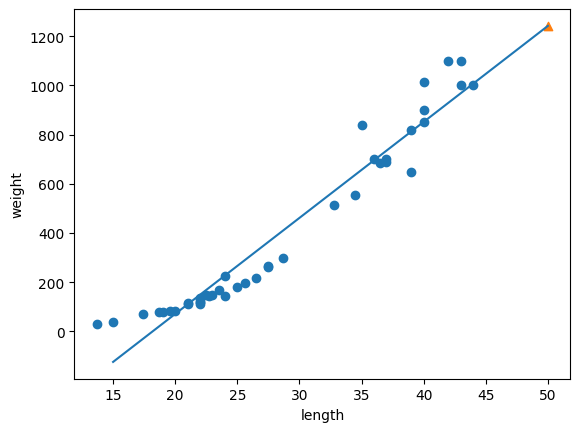

In [ ]:
# 농어의 길이 15- 50 까지 시각화

plt.scatter(train_input, train_target)

# 1차방정식
plt.plot([15,50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])


# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


## 문제점

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [ ]:
# train 점수가 knn 때 보다 더 떨어졌다?
# train, test 점수가 둘다 그닥 높지 않다.
# overfit 보다는 underfit(과소적합) 의심.

In [ ]:
# 또 다른 문제점.

In [ ]:
# 직선으로 왼쪽 아래로 쭉 뻗음
# length 15cm 농어의 무게가 음수? <- 말이 안됨.

# 직선모델로 표현하기에는 부족함 -> 곡선 모델을 적용해보자.

![](https://velog.velcdn.com/images/leeeeeyeon/post/3aef313a-b68c-4b8d-acfa-0ad0eb989c60/image.png)


# 다항회귀 (Polynomial Regression)

In [ ]:
"""
이러한 2차 방정식 그래프를 그리려면 길이를 제곱한 항이 훈련세트에 추가되어야 합니다.
numpy 를 사용하면 손쉽게 만들수 있다.

무게 = a x 길이² - b x 길이 + c   <=  길이의 제곱과 원래길이 두가지 모두 필요하다.

 length² ←  length
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 ...
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]
"""
None

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
train_poly[:10]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ]])

In [ ]:
train_poly.shape, test_poly.shape

((42, 2), (14, 2))

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target) # 타겟값은 그대로 사용

LinearRegression()

In [ ]:
# 50cm 농어의 무게 예측하기!
lr.predict([[50**2, 50]])

array([1573.98423528])

In [ ]:
# 모델이 훈련한 파라미터 ('계수', '절편')
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


In [ ]:
# [  1.01433211 -21.55792498] 116.0502107827827

# 무게 = 1.01 x 길이**2 - 21.6 x 길이 + 116

In [ ]:
# 직선이 아닌 곡선인데도 선형회귀 맞나?
# 2차 방정식도 선형회귀로 볼 수 있다

In [ ]:
#이러한 방정식을 다항식 (polynomial) 이라 부르며
#다항식을 사용한 선형 회귀를 다항회귀 (polynomial regression) 이라 한다

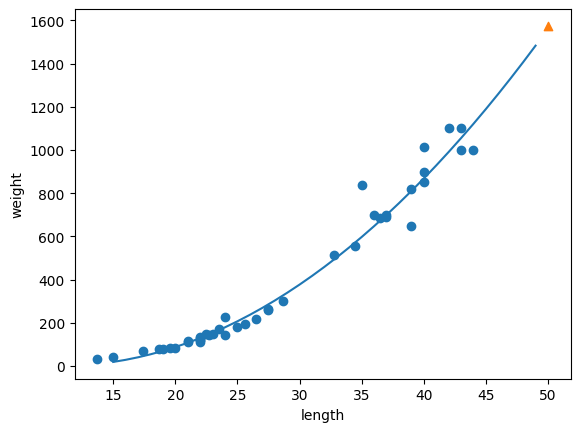

In [ ]:
# 시각화
# 구간별 직선을 그리기 위해 정수배열 만들기
point = np.arange(15, 50) # 15~49
plt.scatter(train_input, train_target)

# 2차 방정식 그래프
plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 점수 확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 문제점

In [ ]:
"""
다항회귀를 통해 농어의 무게를 어느정도 예측할수 있지만,
여전히 train 세트보다 test 세트의 점수가 높은 점이 걸린다... (underfit 상황.)
이 문제를 해결하려면 제곱보다 더 '고차항'을 넣어야 할텐데...
얼마나 더 고차항을 넣어야 할지 모르겠다.
수동으로 매번 고차항 넣기도 힘들다.

어케할까?
"""
None


In [ ]:
# 원본 데이터에는 length 외에 다른 feature 들도 있었다!
fish_df.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [ ]:
# length 말고 다른 feature 들도 weight 에 영향을 줄거다(당연!)

# scikit-learn 의 PolynomialFeatures 사용하여 편하게 이들 특성 적용 가능.

# 특성 공학, 다중회귀 (multiple regression)

In [ ]:
# 입력데이터가 농어의 '길이' 뿐인가?
# 선형회귀는 '특성' 많을수록 좋은 효과를 기대해볼수 있다.
# 직전에는 '하나의 특성'을 사용하여 선형 회귀 모델을 훈련시켜보았다.
# '여러개의 특성'을 사용한 선형 회귀를 다중회귀 (multiple regression) 이라 한다

![](https://media.licdn.com/dms/image/D4D12AQEhqo6dQF0_IA/article-cover_image-shrink_720_1280/0/1698041185106?e=2147483647&v=beta&t=8YFNXke-HHsGaUsq63x48xuUFfNYdbSTIPhgdH45gQI)



In [ ]:
# '특성' 이 2개 이면 '평면' 을 학습하게 됩니다
# 특성이 2개 + 타겟값 1개  => 3차원 공간을 형성하게 됨.

# 이때 선형 회귀 방정식은

# 타킷 = a x feature1 + b x feature2 + c (절편)  의 평면이 됩니다.

# 만약 특성에 3개 이상이면?   =>  그림으로는 그릴수 없는 초평면..

# 선형회귀를 단순한 직선이나 평면으로 생각하여 성능이 무조건 낮다고 오해해서는 안됩니다.
# 특성이 많은 고차원에서 선형회귀는 매우 복잡한 모델도 표현할수도 있다!

## 특성공학 이란
feature enginering

- 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업


In [ ]:
"""
이번 예제에서 농어의 길이 뿐 아니라 농어의 '높이(Height)'와 '두께(Width)'도 함께 사용해보자.

이전 예제에서 처럼 3개의 특성에 각각 제곱하여 추가합니다.
거기다가 각 특성을 서로 곱해서 '또 다른 특성'을 만들겠습니다.

즉 '길이 x 높이' 를 새로운 특성으로 만들어 보는 겁니다.
이렇게 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 특성공학 (feature enginering) 이라 합니다

직접 특성을 제곱하고 특성끼리 곱해서 새로운 특성을 추가할 수도 있지만 사이킷런에서 제공하는
편리한 도구를 사용해봅니다
"""
None


## 데이터 준비

In [ ]:
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [ ]:
# 농어의 길이, 높이, 두께
perch_df = fish_df[fish_df.Species == 'Perch'][['Length', 'Height', 'Width']]
perch_df

,Length,Height,Width
72,8.4,2.1120,1.4080
73,13.7,3.5280,1.9992
74,15.0,3.8240,2.4320
75,16.2,4.5924,2.6316
76,17.4,4.5880,2.9415
77,18.0,5.2224,3.3216
78,18.7,5.1992,3.1234
79,19.0,5.6358,3.0502
80,19.6,5.1376,3.0368
81,20.0,5.0820,2.7720


In [ ]:
perch_full = perch_df.to_numpy()
perch_full

array([[ 8.4   ,  2.112 ,  1.408 ],
       [13.7   ,  3.528 ,  1.9992],
       [15.    ,  3.824 ,  2.432 ],
       [16.2   ,  4.5924,  2.6316],
       [17.4   ,  4.588 ,  2.9415],
       [18.    ,  5.2224,  3.3216],
       [18.7   ,  5.1992,  3.1234],
       [19.    ,  5.6358,  3.0502],
       [19.6   ,  5.1376,  3.0368],
       [20.    ,  5.082 ,  2.772 ],
       [21.    ,  5.6925,  3.555 ],
       [21.    ,  5.9175,  3.3075],
       [21.    ,  5.6925,  3.6675],
       [21.3   ,  6.384 ,  3.534 ],
       [22.    ,  6.11  ,  3.4075],
       [22.    ,  5.64  ,  3.525 ],
       [22.    ,  6.11  ,  3.525 ],
       [22.    ,  5.875 ,  3.525 ],
       [22.    ,  5.5225,  3.995 ],
       [22.5   ,  5.856 ,  3.624 ],
       [22.5   ,  6.792 ,  3.624 ],
       [22.7   ,  5.9532,  3.63  ],
       [23.    ,  5.2185,  3.626 ],
       [23.5   ,  6.275 ,  3.725 ],
       [24.    ,  7.293 ,  3.723 ],
       [24.    ,  6.375 ,  3.825 ],
       [24.6   ,  6.7334,  4.1658],
       [25.    ,  6.4395,  3

In [ ]:
# target 값
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [ ]:
train_input, test_input, train_target, test_target = \
  train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
train_input.shape, test_input.shape

((42, 3), (14, 3))

## transformer (변환기)
사이킷럿에서 '특성(feature)'를 만들거나 전처리 하기 위해 제공되는 클래스들을 transformer 라 한다.

사이킷 런의 모델 클래스에 일관된 fit(), score(), predict() 메소드가 있는 것처럼,

transformer 클래스는 fit(),  transform() 메소드를 제공함


In [ ]:
from sklearn.preprocessing import PolynomialFeatures # <-변환기 중 하나

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures

```python
class sklearn.preprocessing.PolynomialFeature(
  degree=2,
  *,
  interaction_only=False,
  include_bias=True,
  order='C')
```


In [ ]:
# 클래스 동작 확인

In [ ]:
# 2개의 특성 2와 3으로 이루어진 샘플 하나를 적용해보기

poly = PolynomialFeatures()
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

In [ ]:
# array([[1., 2., 3., 4., 6., 9.]])

# fit(): 새롭게 만들 특성조합 찾기
# transform(): 실제로 데이터 변환

# 2개의 특성을 가진 샘플 [2,3] -> 6개의 특성을 가진 샘플 [1., 2., 3., 4., 6., 9.]으로 변환


In [ ]:
# PolynomialFeatures 클래스는 '기본적'으로
# 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가합니다.
# 2 와 3을 각기 제곱한 4와 9가 추가되었고, 2 와 3을 곱한 6이 추가되었습니다.

In [ ]:
# 앞의 1은 왜 추가?
#  무게 = a x 길이 + b x 높이 + c x 두께 + d x 1
# ↑ 사실, 선형방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼수 있습니다.
# 이렇게 놓고 보면 특성은 (길이, 높이, 두께, 1) 이 됩니다.
# 하지만 사이킷 럿의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없습니다.
# 그래서 include_bias=False 로 지정하여 다시 특성을 변환하겠습니다

In [ ]:
poly = PolynomialFeatures(include_bias= False)
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

In [ ]:
#↑ 절편을 위한 항이 제거되고
#'특성의 제곱'과 '특성끼리 곱' 한 항만 추가되었습니다.


In [ ]:
# train_input 에 적용하기

poly = PolynomialFeatures(include_bias= False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

train_poly.shape

(42, 9)

In [ ]:
# 9개의 feature는 어캐 만들어진걸까?

# 어떻게 만들어졌는지 확인하는 방법
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
# ['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2','x2^2']

# 'x0' 는 첫번째 특성
# 'x0^2' 는 첫번째 특성의 제곱
# 'x0 x1' 은 첫번째 특성과 두번째 특성의 곱


In [ ]:
# 위 변환기로 test 세트도 변환
test_poly = poly.transform(test_input)

test_poly.shape

(14, 9)

In [ ]:
# 항상 훈련세트를 기준으로 테스트 세트를 변환하도록 하자!

## 다중 회귀 모델 훈련

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

lr.score(train_poly, train_target)

0.9903557670312702

In [ ]:
# 매우 높은 점수 나옴! <- 농어의 길이 뿐 아니라 높이와 두께도 사용 + 특성제곱, 곱 추가, 다항특성 추가

In [ ]:
lr.score(test_poly, test_target)

0.9712376207461857

In [ ]:
# '길이' 만 사용했을 때 나타났던 underfit 문제는 거의 없다

In [ ]:
# 특성을 더 많이 추가 가능
# ex) 3제곱, 4제곱
# degree= 고차항의 최대차수 지정.

In [ ]:
# 5제곱까지의 특성을 만들어 훈련

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)
print(test_poly.shape)

(42, 55)
(14, 55)


In [ ]:
lr.fit(train_poly, train_target)

lr.score(train_poly, train_target)

0.9999999999996642

In [ ]:
lr.score(test_poly, test_target)

-129.88151246056472

![](https://miro.medium.com/v2/resize:fit:1125/1*_7OPgojau8hkiPUiHoGK_w.png)


In [ ]:
# 샘플개수 42개, 55개의 특성의 특성으로 훈련

In [ ]:
# 위와같은 overfit을 해결하기 위해 다시 특성을 줄일필요가 있다.

In [ ]:
# overfit을 억제하는 다른 방법을 배워봅니다.

# 규제 (regularization)

**규제 (regularization)** 은 머신러닝 모델이 train 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것

즉, 모델이 훈련세트에 과대적합 (overfit) 되지 않도록 만드는 거다.

선형 회귀 모델의 경우 특성에 곱해지는 계수 (또는 기울기) 의 크기를 작게 만드는 일입니다.

아래 그림을 살펴봅니다

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/underfitting-overfitting.png)

오른쪽의 그림은 train 세트를 과도하게 학습했고,  가운데는 기울기를 줄여서 보다 보편적인 (general) 패턴을 학습하고 있습니다


In [ ]:
# 규제를 적용하기전에 전처리 해두자. 표준화 전처리

from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
ss.mean_, ss.scale_ ## 55개의 특성에 대한 평균과 표준편차 정보

(array([2.84452381e+01, 8.04177619e+00, 4.82055476e+00, 8.85315000e+02,
        2.53470948e+02, 1.51956220e+02, 7.29276742e+01, 4.36967156e+01,
        2.62853281e+01, 2.97326070e+04, 8.59774772e+03, 5.15176747e+03,
        2.49656208e+03, 1.49553817e+03, 8.99087988e+02, 7.27845314e+02,
        4.35963245e+02, 2.62077075e+02, 1.58112864e+02, 1.05917983e+06,
        3.08417994e+05, 1.84632019e+05, 9.01174973e+04, 5.39424625e+04,
        3.23950805e+04, 2.64197426e+04, 1.58147036e+04, 9.49827765e+03,
        5.72355360e+03, 7.77060032e+03, 4.65212847e+03, 2.79466584e+03,
        1.68451523e+03, 1.01877250e+03, 3.93876111e+07, 1.15189511e+07,
        6.88783177e+06, 3.37848356e+06, 2.02012802e+06, 1.21163040e+06,
        9.93702300e+05, 5.94216722e+05, 3.56448011e+05, 2.14482543e+05,
        2.93083339e+05, 1.75288678e+05, 1.05174815e+05, 6.33063832e+04,
        3.82250476e+04, 8.66772369e+04, 5.18541727e+04, 3.11238569e+04,
        1.87420990e+04, 1.13226020e+04, 6.86230209e+03]),
 array

In [ ]:
"""
선형 회귀 모델에 규제를 추가한 모델을 릿지 (ridge) 와 라쏘(lasso) 라고 부릅니다.
두 모델은 규제를 가하는 방법에 차이가 있습니다.

릿지: 계수를 제곱한 값을 기준으로 규제를 적용.  (일반적으로 릿지 선호)
라쏘: 계수의 절댓값을 기준으로 규제를 적용.

두 알고리즘 모두 계수의 크기를 줄이지만, 라쏘는 아예 0으로 만들 수도 있습니다.
사이킷런은 두 알고리즘 모두 제공합.
"""
None

# 릿지 회귀 : Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

```python
class sklearn.linear_model.Ridge(
  alpha=1.0,
  *,
  fit_intercept=True,
  copy_X=True,
  max_iter=None,
  tol=0.0001,
  solver='auto',
  positive=False,
  random_state=None)
```


In [ ]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)

ridge.score(train_scaled, train_target)

0.9896217956447125

In [ ]:
ridge.score(test_scaled, test_target)

0.9788853860988027

In [ ]:
# 테스트 세트 점수가 정상으로 돌아왔다
# 많은 특성을 사용함에도 불구하고 train 세트에 과대적합(ovrfit) 되지 않도록 억제되었다.

In [ ]:
# alpha 값 : 규제의 강도 조절

# 릿지 와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있습니다.
# 모델 객체를 만들때 alpha 매개변수로 규제의 강도를 조절할수 있다
# alpha 값이 크면 규제강도가 세지므로 계수 값을 더 줄이고 조금 더 과소 적합 되도록 유도합니다.
# alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형회귀 모델과 유사해지므로 과대적합 될 가능성이 큽니다.

# alpha 값은 hyper parameter 입니다 ↓

## hyperparameter

In [ ]:
# hyperparameter : 사전에 직접 지정해 주어야 하는 세팅값

# alpha 값 처럼  사전에 사람이 직접 지정해주어야 하는 값들을 하이퍼 파라미터 (hyperparameter) 라고 부릅니다.
# 사이킷런 과 같은 머신러닝 라이브러리에서 하이퍼 파라미터는 클래스와 메소드의 매개변수로 표현됨.

In [ ]:
# alphar= 값의 변화에 따른 결정계수 값의 그래프를 그려보면 좋다.
# 최적의 alpha 값은? -> train세트점수와 test세트 점수가 가장 가까운 지점

In [ ]:
# alpha 값이 바뀔때마다 score() 값들을 저장할 리스트 준비
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  # 모델
  ridge = Ridge(alpha=alpha)
  # 훈련
  ridge.fit(train_scaled, train_target)
  # 훈련점수와 테스트점수를 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))


In [ ]:
# alpha 값을 x축으로 표현하려 하는데...
# 0.001 부터 10배씩이라... 왼쪽이 너무 촘촘해짐
# 6개를 동일한 간격표현을 위해. 로그함수로 바꾸어 지수로 표현.
# 0.001 => -3,  0.002 => -2..

# numpy 로그 함수는
#  np.log()   :  자연상수 e 를 밑으로 하는 자연로그
#  np.log10()  : 10을 밑으로 하는 상용로그

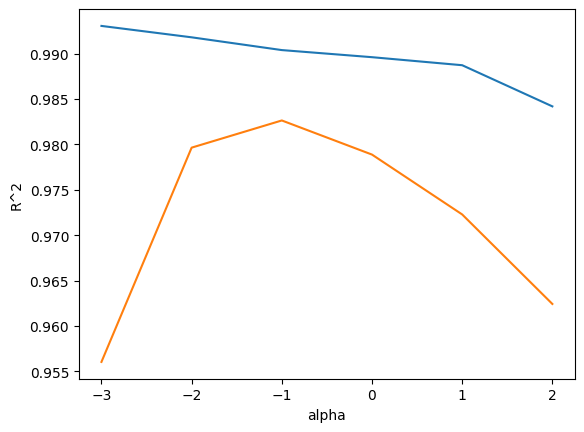

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# 왼쪽을 보면 train 세트와 test 세트의 점수차이가 아주 큽니다.
#     => train 세트에는 잘 맞고 test 세트에는 형편없는 과대적합(overfit)의 전형적인 모습
#반대로 오른쪽 편은  train 세트와 test 셑트는 점수가 모두 낮아지는 경향을 보이는 과소적합 (underfit) 으로 가는 모습
#적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 점수가 가장 높은 -1,  즉 0.1 입니다.


In [ ]:
# 최적의 alpha=값으로 세팅된 모델로 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.990404845594141
0.9826465162736733


In [ ]:
# train 세트와 test 세트의 점수가 비슷하게 모두 높고,
# overfit 과 underfit 사이에서 균형을 맞추고 있다.

# 라쏘 회귀 (Lasso Regression)

In [ ]:
# 기본적으로 Ridge와 사용방법이 비슷

In [ ]:
from sklearn.linear_model import Lasso

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

```python
class sklearn.linear_model.Lasso(
  alpha=1.0,
  *,
  fit_intercept=True,
  precompute=False,
  copy_X=True,
  max_iter=1000,
  tol=0.0001,
  warm_start=False,
  positive=False,
  random_state=None,
  selection='cyclic')
```


In [ ]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9898014198970121
0.9798798667260247


In [ ]:
# alpha 값이 바뀔때마다 score() 값들을 저장할 리스트 준비
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  # 모델
  lasso = Lasso(alpha=alpha, max_iter=10000) # max_iter= :최적의 개수를 찾기 위한 반복 계산 횟수
  # 훈련
  lasso.fit(train_scaled, train_target)
  # 훈련점수와 테스트점수를 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.872e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
"""  ConvergenceWarning
↑ warning 이 뜬다. 뭐지?
라쏘 모델을 훈련할때 ConvergenceWarning 경고가 뜰수 있다.
사이킷 런의 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복횟수가 부족할 때 이런 경고가 발생합니다
이 반복 횟수를 충분히 늘리기 위해 max_iter 매개변수의 값을 10000 으로 지정했습니다.
필요하면 더 늘릴 수 있지만, 이 문제에서는 큰 영향을 끼치지 않습니다.
"""
None


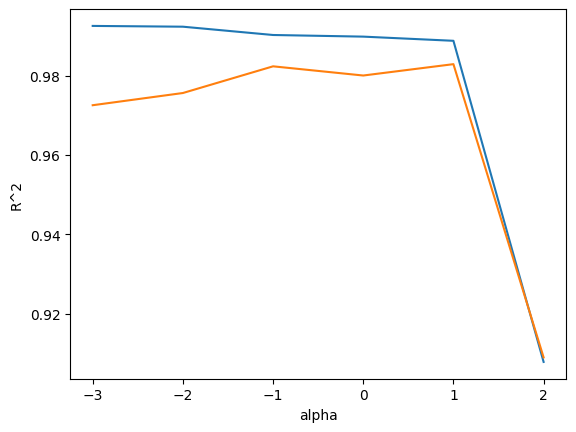

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
"""
↑ 이 그래프도 왼쪽은 과대적합을 보여주고, 오른쪽으로 갈수록 훈련세트와 테스트 세트의 점수가 좁셔지고 있다.
그러나 가장 오른쪽은 둘다 크게 점수가 떨어집니다.  분명히 과소 적합 되는 모델입니다.
위 그래프에서 라쏘 모델의 최적의 alpha 값은 1.  즉 10 입니다.
이 값으로 다시 모델을 훈련하겠습니다
"""
None

In [ ]:
lasso = Lasso(alpha=10) # 최적의 alpha 값으로 훈련
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.988820885788649
0.9823020708550176


In [ ]:
# 라쏘 모델은 계수 값을 아예 0으로 만들수도 있다.
# 계수는 coef_ 속성에 담겨 있다.

lasso.coef_

array([ 0.        ,  0.        ,  0.        , 13.11036343, 55.12266859,
       41.48994624,  0.        ,  0.        , 13.9830843 ,  0.        ,
       43.4392343 ,  4.64928255, 48.51500022,  6.26668787, 11.80207049,
        0.        ,  0.        , 13.35211297, 22.11736679,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       19.18672642,  0.        ,  0.        ,  0.        , 15.53954944,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 18.55402184,
        0.        ,  0.        ,  0.        ,  0.        , 14.99032734,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [ ]:
# 이중에 0 인것을 세어보자
np.sum(lasso.coef_ == 0)

40

In [ ]:
# 55개의 특성을 모델에 주입했지만
# 라쏘모델이 사용한 특성은 15개 밖에 되지 않는다.
# 이러한 특징 때문에 라쏘 모델은 유용한 특성을 골라내는 용도로도 활용가능